In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Importing the dataset
df=pd.read_csv('day.csv')

In [3]:
df


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
# Shape of dataset
df.shape

(731, 16)

In [5]:
# Using isna() function to check NaN values in dataframe
df.isna()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Drop columns which are not necessary
df=df.drop(['dteday', 'casual', 'registered'],axis=1)

In [8]:
df=df.drop(['instant'],axis=1)

In [9]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [10]:
df.shape

(731, 12)

In [12]:
# Remove rows which has null vlaues
df=df.dropna()

In [13]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [14]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [15]:
for col in df:
    print(df[col].value_counts(ascending=False), '\n\n\n')

3    188
2    184
1    181
4    178
Name: season, dtype: int64 



1    366
0    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: mnth, dtype: int64 



0    710
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64 



1    500
0    231
Name: workingday, dtype: int64 



1    463
2    247
3     21
Name: weathersit, dtype: int64 



0.635000    5
0.265833    5
0.680000    4
0.710833    4
0.564167    4
           ..
0.669167    1
0.643333    1
0.707059    1
0.700000    1
0.215833    1
Name: temp, Length: 499, dtype: int64 



0.654688    4
0.375621    3
0.637008    3
0.571975    2
0.466525    2
           ..
0.578946    1
0.609229    1
0.602130    1
0.626900    1
0.223487    1
Name: atemp, Length: 690, dtype: int64 



0.613333    4
0.605000    3
0.590000    3
0.538333    3
0.690000    3
           ..
0.548333    1


In [16]:
# Replace negative values in dataframe with 0
num = df._get_numeric_data()
num[num < 0] = 0

In [17]:
for col in df:
    print(df[col].value_counts(ascending=False), '\n\n\n')

3    188
2    184
1    181
4    178
Name: season, dtype: int64 



1    366
0    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: mnth, dtype: int64 



0    710
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64 



1    500
0    231
Name: workingday, dtype: int64 



1    463
2    247
3     21
Name: weathersit, dtype: int64 



0.635000    5
0.265833    5
0.680000    4
0.710833    4
0.564167    4
           ..
0.669167    1
0.643333    1
0.707059    1
0.700000    1
0.215833    1
Name: temp, Length: 499, dtype: int64 



0.654688    4
0.375621    3
0.637008    3
0.571975    2
0.466525    2
           ..
0.578946    1
0.609229    1
0.602130    1
0.626900    1
0.223487    1
Name: atemp, Length: 690, dtype: int64 



0.613333    4
0.605000    3
0.590000    3
0.538333    3
0.690000    3
           ..
0.548333    1


In [18]:
Independant_variables=df.drop(['temp'],axis=1)
Dependant_variable=df['temp']

In [19]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(Independant_variables,Dependant_variable,test_size=0.3)

In [21]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(511, 11) (511,)
(220, 11) (220,)


In [22]:
# Fitting Linear Regression to the dataset
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
model.score(X_test,y_test)

0.9618679848468319

In [24]:
y_pred = model.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0.26139833 0.24843521 0.57131762 0.46340071 0.73222751 0.42925864
 0.65221116 0.30942026 0.27721202 0.33599549 0.24746918 0.5244218
 0.72728082 0.707459   0.5515109  0.79293599 0.69154659 0.59194944
 0.53415555 0.24943123 0.42990328 0.4123266  0.1686194  0.75294334
 0.27959153 0.57164315 0.69695136 0.62093264 0.65262078 0.21879391
 0.75169612 0.78289948 0.39884028 0.25300551 0.22447105 0.6078554
 0.2495403  0.58064256 0.62074778 0.41619943 0.39082596 0.60387529
 0.54512197 0.61977368 0.38064467 0.30284106 0.28435554 0.6628038
 0.69963989 0.32409023 0.43345099 0.75005181 0.63043925 0.6819958
 0.47599378 0.69343173 0.31038888 0.25798883 0.7767981  0.31584768
 0.69432705 0.55722329 0.39954645 0.25184504 0.18177377 0.36186834
 0.5507138  0.18857743 0.75539344 0.31570068 0.52105538 0.6341357
 0.67282208 0.50166654 0.29392652 0.62884028 0.32604945 0.63985031
 0.27612366 0.53013777 0.23698819 0.33029211 0.50623254 0.56397112
 0.59818857 0.71825545 0.25223548 0.6706068  0.17

In [25]:
mean_squared_error(y_test,y_pred)

0.0012685416562742769

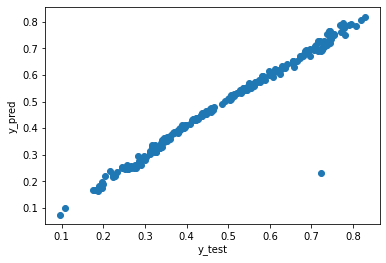

In [26]:
import matplotlib.pyplot as plt

plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.scatter(y_test,y_pred)